In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

C:\Users\gargh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Importing the csv file
dataset = pd.read_csv('heart.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
#Filtering the data by doing One Hot encoding and transforming
dataset = pd.get_dummies(dataset,columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])
standarScaler = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale] = standarScaler.fit_transform(dataset[columns_to_scale])

In [4]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [5]:
#Splitting the data in train and test
y = dataset['target']
X = dataset.drop(['target'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [6]:
#calculating best values for knn classifier
knn_scores = []
for k in range(1,40):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train,y_train)
    knn_scores.append(knn_classifier.score(X_test,y_test))
print(f'Best Choice of k: {np.argmax(knn_scores)+1}')

Best Choice of k: 8


In [7]:
#since we have 8 as best K value we are going to train noe with k = 8
k = 8
knn_classifier = KNeighborsClassifier(n_neighbors = k)
knn_classifier.fit(X_train,y_train)
y_pred = knn_classifier.predict(X_test)
print(f'Accurace = {np.sum(y_pred == y_test)/len(y_test)}')

Accurace = 0.9180327868852459


In [8]:
#calculating best values for SVM
svc_scores = []
kernels = ['linear','poly','rbf','sigmoid']
for i in range(len(kernels)):
    svc_scores_c = []
    for ch in range(1,11):
        if kernels[i] == 'poly':
            svc_scores_poly = []
            for d in range(3,10):
                svc_classifier = SVC(kernel = kernels[i], C = ch, degree=d)
                svc_classifier.fit(X_train,y_train)
                svc_scores_poly.append(svc_classifier.score(X_test,y_test))
            print(f'Best polynomial score: {np.argmax(svc_scores_poly)+3}')
            svc_scores_c.append(svc_scores_poly[np.argmax(svc_scores_poly)])
        else:
            svc_classifier = SVC(kernel=kernels[i],C=ch)
            svc_classifier.fit(X_train,y_train)
            svc_scores_c.append(svc_classifier.score(X_test,y_test))
    print(f'Best choice of c for {kernels[i]}: {np.argmax(svc_scores_c)+1}')
    svc_scores.append(svc_scores_c[np.argmax(svc_scores_c)])
print(f'Best choice of k: {kernels[np.argmax(svc_scores)]}')

Best choice of c for linear: 1
Best polynomial score: 5
Best polynomial score: 5
Best polynomial score: 6
Best polynomial score: 3
Best polynomial score: 7
Best polynomial score: 7
Best polynomial score: 7
Best polynomial score: 7
Best polynomial score: 7
Best polynomial score: 7
Best choice of c for poly: 1
Best choice of c for rbf: 1
Best choice of c for sigmoid: 1
Best choice of k: rbf


Now we know the best kernel for SVM is rbf with C value of 1

In [9]:
#Prediciting the score using best kernel for SVM
svc_classifier = SVC(kernel='rbf',C=1)
svc_classifier.fit(X_train,y_train)
print(f'Score is {svc_classifier.score(X_test,y_test)}')

Score is 0.9016393442622951


In [10]:
#calculating best values for Decision Tree
cr_scores = []
for cr in ['gini','entropy']:
    dt_scores = []
    for i in range(1,len(X.columns)+1):
        dt_classifier = DecisionTreeClassifier(criterion=cr,max_features=i,random_state=42)
        dt_classifier.fit(X_train,y_train)
        dt_scores.append(dt_classifier.score(X_test,y_test))
    print(f'Best max features for {cr}: {np.argmax(dt_scores)+1}')
    cr_scores.append(dt_scores[np.argmax(dt_scores)])
print(f'Best criterion: {"gini" if not np.argmax(cr_scores) else "entropy"}')

Best max features for gini: 14
Best max features for entropy: 29
Best criterion: gini


    We are gonna use gini for decision tree 

In [11]:
#Prediciting the score using best criteria i.e. gini
dt_classifier =DecisionTreeClassifier(criterion='gini',max_features=14,random_state=42)
dt_classifier.fit(X_train,y_train)
print(dt_classifier.score(X_test,y_test))

0.8524590163934426


In [12]:
# Define a range of values for the number of estimators
rf_param_grid = {
    'n_estimators': range(1, 1000, 10)
}

# Create a RandomForestClassifier object
rf = RandomForestClassifier()

# Create a RandomizedSearchCV object with specified parameters
rf_random = RandomizedSearchCV(
    param_distributions=rf_param_grid,  # Use the defined parameter grid
    estimator=rf,                      # Use the RandomForestClassifier
    scoring="accuracy",                # Use accuracy as the scoring metric
    verbose=0,                         # Set verbosity level to 0 (no output during fitting)
    n_iter=100,                        # Number of parameter settings that are sampled
    cv=4                               # Number of folds for cross-validation
)

# Fit the RandomizedSearchCV object on the training data
rf_random.fit(X_train, y_train)

# Get the best parameters found by the RandomizedSearchCV
best_params = rf_random.best_params_

# Print the best parameters
print(f'Best parameters: {best_params}')


Best parameters: {'n_estimators': 501}


<AxesSubplot:ylabel='feature'>

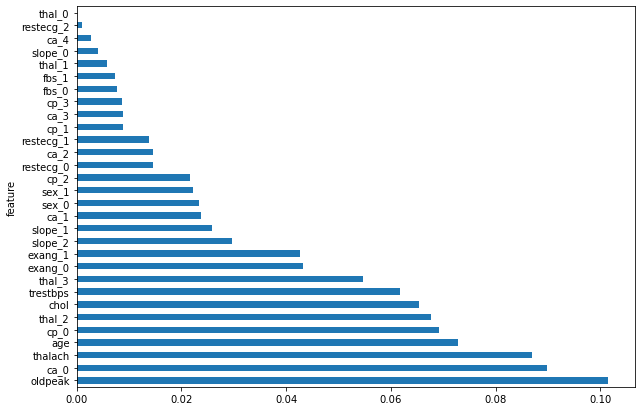

In [13]:
# This function calculates feature importances using a given model and a DataFrame of features.
def feature_imp(df, model):
    # Create an empty DataFrame with columns 'feature' and 'importance'.
    fi = pd.DataFrame(columns=['feature', 'importance'])
    
    # Set the 'feature' column to be the column names of the input DataFrame.
    fi["feature"] = df.columns
    
    # Set the 'importance' column to be the feature importances from the model.
    fi["importance"] = model.best_estimator_.feature_importances_
    
    # Return the DataFrame sorted by importance in descending order.
    return fi.sort_values(by="importance", ascending=False)

# Plot the feature importances in a horizontal bar chart.
# The features will be on the y-axis and their importances on the x-axis.
# The plot will have dimensions 10x7 inches.
# The legend will be turned off.
feature_imp(X_train, rf_random).plot('feature', 'importance', 'barh', figsize=(10,7), legend=False)


In [14]:
# Import necessary libraries
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dropout

# Define a sequential model
model = tf.keras.Sequential([
    # Add a dense layer with 20 units and ReLU activation function
    layers.Dense(20, activation='relu', name='densel'),
    
    # Add a dropout layer with a dropout rate of 20%
    Dropout(0.2),
    
    # Add another dense layer with 25 units and ReLU activation function
    layers.Dense(25, activation='relu', name='dense2'),
    
    # Add another dense layer with 45 units and ReLU activation function
    layers.Dense(45, activation='relu', name='dense3'),
    
    # Add a dropout layer with a dropout rate of 50%
    Dropout(0.5),
    
    # Add another dense layer with 10 units and ReLU activation function
    layers.Dense(10, activation='relu', name='dense4'),
    
    # Add a final dense layer with 2 units and sigmoid activation function
    layers.Dense(2, activation='sigmoid', name='fc1'),
])


In [15]:
from tensorflow import keras  # Import the Keras library from TensorFlow

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Define the loss function as SparseCategoricalCrossentropy
    optimizer=keras.optimizers.Adam(lr=0.001),  # Define the optimizer as Adam with learning rate 0.001
    metrics=['accuracy']  # Monitor the accuracy metric during training
)


In [16]:
# Train the model using the training data (X_train and y_train)
# Set the batch size to 32 and train for 100 epochs
# Set verbose=2 to display progress during training
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=2)

# Evaluate the model using the test data (X_test and y_test)
# Set the batch size to 32 for evaluation
# Set verbose=2 to display progress during evaluation
model.evaluate(X_test, y_test, batch_size=32, verbose=2)


Epoch 1/100


C:\Users\gargh\anaconda3\lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 - 1s - loss: 0.6951 - accuracy: 0.5826 - 881ms/epoch - 110ms/step
Epoch 2/100
8/8 - 0s - loss: 0.6975 - accuracy: 0.5579 - 27ms/epoch - 3ms/step
Epoch 3/100
8/8 - 0s - loss: 0.6827 - accuracy: 0.5620 - 7ms/epoch - 856us/step
Epoch 4/100
8/8 - 0s - loss: 0.6677 - accuracy: 0.5950 - 27ms/epoch - 3ms/step
Epoch 5/100
8/8 - 0s - loss: 0.6561 - accuracy: 0.6033 - 11ms/epoch - 1ms/step
Epoch 6/100
8/8 - 0s - loss: 0.6500 - accuracy: 0.6157 - 11ms/epoch - 1ms/step
Epoch 7/100
8/8 - 0s - loss: 0.6269 - accuracy: 0.6694 - 11ms/epoch - 1ms/step
Epoch 8/100
8/8 - 0s - loss: 0.6212 - accuracy: 0.6901 - 11ms/epoch - 1ms/step
Epoch 9/100
8/8 - 0s - loss: 0.5938 - accuracy: 0.7314 - 11ms/epoch - 1ms/step
Epoch 10/100
8/8 - 0s - loss: 0.5861 - accuracy: 0.7273 - 12ms/epoch - 1ms/step
Epoch 11/100
8/8 - 0s - loss: 0.5532 - accuracy: 0.7686 - 11ms/epoch - 1ms/step
Epoch 12/100
8/8 - 0s - loss: 0.5586 - accuracy: 0.7521 - 11ms/epoch - 1ms/step
Epoch 13/100
8/8 - 0s - loss: 0.4848 - accuracy: 0.7934 -

C:\Users\gargh\anaconda3\lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


[0.6820310354232788, 0.8360655903816223]

In [17]:
# loss: 0.7482 - accuracy: 0.8525

As we can see that the best technique in our case will be K-nearest neighbors

I created random data myself and now going to test knn on it

In [18]:
# Define the data
data = [
    [65, 0, 2, 130, 250, 1, 0, 148, 0, 2.2, 1, 0, 2, 1],
    [42, 1, 0, 120, 230, 0, 1, 170, 0, 1.5, 2, 0, 2, 1],
    [57, 0, 1, 140, 236, 0, 1, 178, 0, 0.8, 2, 0, 2, 1],
    [55, 1, 1, 135, 214, 0, 0, 154, 0, 1.0, 1, 0, 2, 0],
    [48, 0, 3, 150, 250, 0, 1, 168, 0, 1.2, 1, 0, 2, 0],
    [50, 1, 2, 125, 219, 1, 0, 158, 1, 2.0, 2, 0, 3, 0],
    [40, 1, 2, 140, 202, 0, 0, 172, 0, 1.4, 1, 1, 2, 1],
    [61, 0, 1, 150, 265, 1, 1, 153, 1, 3.2, 2, 0, 3, 0],
    [68, 0, 3, 145, 212, 0, 0, 140, 1, 1.8, 2, 2, 2, 0],
    [53, 1, 0, 120, 231, 0, 0, 166, 0, 0.5, 2, 0, 2, 1],
    [58, 1, 0, 114, 318, 0, 2, 140, 0, 4.4, 0, 3, 1, 0],
    [43, 1, 0, 132, 247, 1, 0, 143, 1, 0.1, 1, 4, 3, 0],
    [52, 1, 0, 128, 204, 1, 1, 156, 1, 1, 1, 0, 0, 0]
]

# Define the column names
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','target'
]

# Create the DataFrame
df = pd.DataFrame(data, columns=column_names)

# Print the DataFrame
print(df)


    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    65    0   2       130   250    1        0      148      0      2.2   
1    42    1   0       120   230    0        1      170      0      1.5   
2    57    0   1       140   236    0        1      178      0      0.8   
3    55    1   1       135   214    0        0      154      0      1.0   
4    48    0   3       150   250    0        1      168      0      1.2   
5    50    1   2       125   219    1        0      158      1      2.0   
6    40    1   2       140   202    0        0      172      0      1.4   
7    61    0   1       150   265    1        1      153      1      3.2   
8    68    0   3       145   212    0        0      140      1      1.8   
9    53    1   0       120   231    0        0      166      0      0.5   
10   58    1   0       114   318    0        2      140      0      4.4   
11   43    1   0       132   247    1        0      143      1      0.1   
12   52    1   0       12

In [19]:
df = pd.get_dummies(df,columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])
standarScaler = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = standarScaler.fit_transform(df[columns_to_scale])

In [20]:
df_y = df['target']
df_X = df.drop(['target'],axis = 1)

In [21]:
random_data_pred = knn_classifier.predict(df_X)

In [22]:
random_data_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [23]:
print(random_data_pred.tolist())
print(df_y.values)

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0]
[1 1 1 0 0 0 1 0 0 1 0 0 0]


In [24]:
print(f'Accurace = {np.sum(random_data_pred == df_y)/len(df_y)}')

Accurace = 0.6923076923076923
